# <center>Structural Analysis and Visualization of Networks</center>

## <center>Home Assignment #4: Community Detection Algorithms

### <center>Student: *{Yevgeniya Kosheleva}*</center>

#### <hr /> General Information

**Due Date:** 03.04.2016 23:59 <br \>
**Late submission policy:** the task will not be graded! <br \>


Please send your reports to <network.hse.2016@gmail.com> with message subject of the following structure:<br \> **[HSE Networks 2015] *{LastName}* *{First Name}* HA*{Number}***

Support your computations with figures and comments. <br \>
If you are using IPython Notebook you may use this file as a starting point of your report.<br \>
<br \>
<hr \>

## Problems

### Task 1* (For those who have not done that during the seminar)

On this seminar your are asked to implement simple community detection algorightm. It is called [Markov Cluster Algorithm](http://micans.org/mcl/) (MCL).

Implement Markor Clustering Algorithm

**Input:** Transition matrix $T = D^{-1}A$

**Output:** Adjacency matrix $M^*$

1. Set $M = T$
2. **repeat:**
    3. *Expansion Step:* $M = M^p$ (usually $p=2$)
    4. *Inflation Step:* Raise every entry of $M$ to the power $\alpha$ (usualy $\alpha=2$)
    5. *Renormalize:* Normalize each row by its sum
    6. *Prunning:* Replace entries that are close to $0$ by pure $0$
7. **until** $M$ converges
8. $M^* = M$
<br\>
<br\>

As a result you should get a cluster matrix s.t. elements of the cluster correspont to nonzero elements of the columns of the matrix. 
<br\>
* Run this method for network [1](https://www.hse.ru/data/2016/03/15/1127695811/network1.mat), [2](https://www.hse.ru/data/2016/03/15/1127699956/network2.mat) and [3](https://www.hse.ru/data/2016/03/15/1127703057/network3.mat).
* Play with the parameters ($p$, $\alpha$, zero tolerance), analyse the results

<hr />


In [18]:
import numpy as np
import logging
import scipy.io
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [19]:
def normalize(A):
    column_sums = A.sum(axis=0)
    new_matrix = A / column_sums[np.newaxis, :]
    return new_matrix

In [20]:
def add_diag(A, mult_factor):
    return A + mult_factor * np.identity(A.shape[0])

In [21]:
def stop(M, i):
    #if i%5==4:
    m = np.max( M**2 - M) - np.min( M**2 - M)
    #print(np.max( M**2 - M),np.min( M**2 - M),i)
    if m==0:
            #print ("Stop at iteration %s" % i)
            return True
    return False

In [22]:
def get_clusters(A):
    clusters = []

    for i, r in enumerate((A>0).tolist()):
        if r[i]:
            clusters.append(A[i,:]>0)

    clust_map  ={}
    for cn , c in enumerate(clusters):
        for x in  [ i for i, x in enumerate(c) if x ]:
            clust_map[cn] = clust_map.get(cn, [])  + [x]

    return clust_map

In [23]:
def inflate(A, inflate_factor):
    return normalize(np.power(A, inflate_factor))

def expand(A, expand_factor):
    return np.linalg.matrix_power(A, expand_factor)

In [24]:
def mcl(M, expand_factor = 2, inflate_factor = 2, max_loop = 10 , mult_factor = 1):
    M = add_diag(M, mult_factor)
    M = normalize(M)

    for i in range(max_loop):
        logging.info("loop", i)
        M = inflate(M, inflate_factor)
        M = expand(M, expand_factor)
        if stop(M, i): break

    clusters = get_clusters(M)
    return M, clusters

In [25]:
def networkx_mcl(G, expand_factor = 2, inflate_factor = 2, max_loop = 10 , mult_factor = 1):
    A = nx.adjacency_matrix(G)
    return mcl(np.array(A.todense()), expand_factor, inflate_factor, max_loop, mult_factor)

In [26]:
def draw(G, A, cluster_map):

    clust_map = {}
    for k, vals in cluster_map.items():
        for v in vals:
            clust_map[v] = k

    colors = []
    for i in range(len(G.nodes())):
        colors.append(clust_map.get(i, 100))

    pos = nx.spring_layout(G)

    from matplotlib.pylab import matshow, show, cm
    plt.figure(2)
    nx.draw_networkx_nodes(G, pos,node_size = 200, node_color =colors , cmap=plt.cm.Blues,greed =False )
    nx.draw_networkx_edges(G,pos, alpha=0.5)
    matshow(A, fignum=1, cmap=cm.gray)
    plt.show()
    show()

### Network1

Number of clusters 4


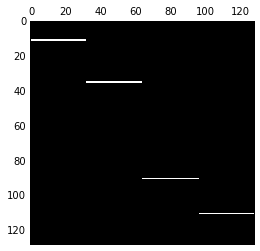

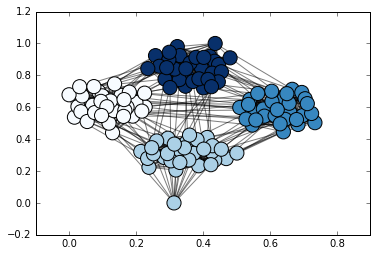

In [27]:
data = scipy.io.loadmat('/Users/Evgenia/Downloads/network1.mat')
A = data['A'].astype('float')

A=np.matrix(A)
G=nx.from_numpy_matrix(A)
M, clusters = networkx_mcl(G,expand_factor = 3, inflate_factor = 2, max_loop = 100 , mult_factor = 1)
print "Number of clusters", len(clusters)
draw(G, M, clusters)

Analyse parameters (print number of clusters)

In [11]:
df = {a: [] for a in range(1,11)}
for ex_f in range(1,11):
    for inf_f in range (1,11):
        M, clusters = networkx_mcl(G,expand_factor = ex_f, inflate_factor = inf_f, max_loop = 100)
        df[ex_f].append(len(clusters))
index = ["a = "+str(i) for i in range (1,11)]
columns = ["p = "+str(i) for i in range (1,11)]
data=pd.DataFrame(df, index = index)
data.columns = columns
data

,p = 1,p = 2,p = 3,p = 4,p = 5,p = 6,p = 7,p = 8,p = 9,p = 10
a = 1,128,128,128,128,128,128,128,128,128,128
a = 2,128,4,4,4,1,1,1,1,1,1
a = 3,128,127,4,4,4,4,4,2,1,1
a = 4,128,128,4,4,4,4,4,4,4,4
a = 5,128,128,4,4,4,4,4,4,4,4
a = 6,128,128,4,4,4,4,4,4,4,4
a = 7,128,128,4,4,4,4,4,4,4,4
a = 8,128,128,5,4,4,4,4,4,4,4
a = 9,128,128,5,4,4,4,4,4,4,4
a = 10,128,128,6,4,4,4,4,4,4,4


### Network2

Number of clusters 4


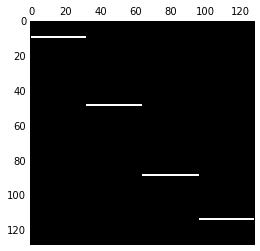

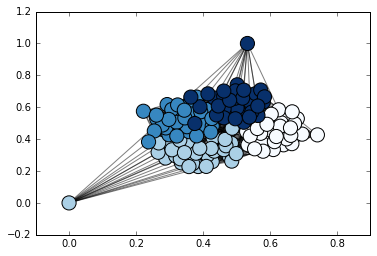

In [86]:
data = scipy.io.loadmat('/Users/Evgenia/Downloads/network2.mat')
A = data['A'].astype('float')

A=np.matrix(A)
G=nx.from_numpy_matrix(A)
M, clusters = networkx_mcl(G,expand_factor = 3, inflate_factor = 3, max_loop = 100 , mult_factor = 1)
print "Number of clusters", len(clusters)
draw(G, M, clusters)

Analyse parameters (print number of clusters)

In [13]:
df = {a: [] for a in range(1,11)}
for ex_f in range(1,11):
    for inf_f in range (1,11):
        M, clusters = networkx_mcl(G,expand_factor = ex_f, inflate_factor = inf_f, max_loop = 100)
        df[ex_f].append(len(clusters))
index = ["a = "+str(i) for i in range (1,11)]
columns = ["p = "+str(i) for i in range (1,11)]
data=pd.DataFrame(df, index = index)
data.columns = columns
data

,p = 1,p = 2,p = 3,p = 4,p = 5,p = 6,p = 7,p = 8,p = 9,p = 10
a = 1,128,128,128,128,128,128,128,128,128,128
a = 2,128,6,1,1,1,1,1,1,1,1
a = 3,128,128,4,1,1,1,1,1,1,1
a = 4,128,128,4,4,1,1,1,1,1,1
a = 5,128,128,5,4,1,1,1,1,1,1
a = 6,128,128,9,4,4,1,1,1,1,1
a = 7,128,128,10,4,4,1,1,1,1,1
a = 8,128,128,12,4,4,2,1,1,1,1
a = 9,128,128,14,6,4,4,1,1,1,1
a = 10,128,128,16,9,4,4,1,1,1,1


### Network3

Number of clusters 2


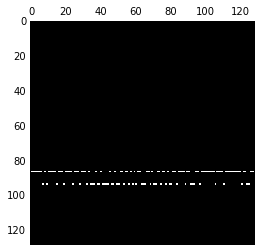

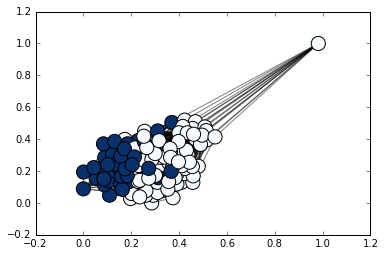

In [88]:
data = scipy.io.loadmat('/Users/Evgenia/Downloads/network3.mat')
A = data['A'].astype('float')

A=np.matrix(A)
G=nx.from_numpy_matrix(A)
M, clusters = networkx_mcl(G,expand_factor = 3, inflate_factor = 4, max_loop = 100 , mult_factor = 1)
print "Number of clusters", len(clusters)
draw(G, M, clusters)

Analyse parameters (print number of clusters)

In [15]:
df = {a: [] for a in range(1,11)}
for ex_f in range(1,11):
    for inf_f in range (1,11):
        M, clusters = networkx_mcl(G,expand_factor = ex_f, inflate_factor = inf_f, max_loop = 100)
        df[ex_f].append(len(clusters))
index = ["a = "+str(i) for i in range (1,11)]
columns = ["p = "+str(i) for i in range (1,11)]
data=pd.DataFrame(df, index = index)
data.columns = columns
data

,p = 1,p = 2,p = 3,p = 4,p = 5,p = 6,p = 7,p = 8,p = 9,p = 10
a = 1,128,128,128,128,128,128,128,128,128,128
a = 2,128,128,1,1,1,1,1,1,1,1
a = 3,128,128,1,1,1,1,1,1,1,1
a = 4,128,128,2,1,1,1,1,1,1,1
a = 5,128,128,9,1,1,1,1,1,1,1
a = 6,128,128,21,1,1,1,1,1,1,1
a = 7,128,128,32,4,1,1,1,1,1,1
a = 8,128,128,38,42,1,1,1,1,1,1
a = 9,128,128,42,110,1,1,1,1,1,1
a = 10,128,128,43,126,1,1,1,1,1,1


### Task 2

Load [Yahoo Music network](https://www.hse.ru/data/2016/03/15/1127704844/music_data.mat). Edges in this network appear if enough number of users have given ratings to both music bands. Note, that edges are weighted with similarity of the ratings.

* Implement *multilevel spectral recursive partitioning* algorithm that was described during the lecture
* Visualize community structure of the network and output some of the dense clusters (with interpretation, if you can)

You can load .mat files with the following commands:

In [36]:
import scipy.io

data = scipy.io.loadmat('/Users/Evgenia/Downloads/music_data.mat')
G = nx.from_scipy_sparse_matrix(data["A"],create_using=nx.Graph(),edge_attribute='weight')
keys = [i for i in range (data["A"].shape[0])]
values_names = [i for i in data["artists"]]
names = dict(zip(keys, values_names))
nx.set_node_attributes(G, 'names',names)


Function of Spectral graph partitioning algorithm

In [38]:
def spectral_partitioning (G):
    # networkx has a method for finding the Laplacian
    laplacian = nx.normalized_laplacian_matrix(G,weight='weight')
    # Use to compute the Fiedler vector, which corresponds to the
    # second smallest eigenvalue of the Laplacian
    w, v =scipy.sparse.linalg.eigs (laplacian,which='SR' )
    algebraic_connectivity = w[1] 
    fiedler_vector = v[:,1].T
    clusters = []
    part_vec = zip(fiedler_vector.tolist(),G.nodes())
    G1_v, G2_v =[], []
    for (v,n) in part_vec:
        
        if v.real<0: G1_v.append(n)
        else: G2_v.append(n)
    clusters.append(G1_v)
    clusters.append(G2_v)
    return clusters



Multilevel spectral recursive partitioning with known number of levels and fix minimum number of nodes

In [58]:
def multilevel_spectral_partitioning (G, levels=2, min_nodes = 10):
    clusters = [G.nodes()]
    levels = levels
    for i in range (levels):
        clusters_next = []
        for cluster in clusters:
            new_clusters = spectral_partitioning (G.subgraph(cluster))
            if (len(new_clusters[0]) > min_nodes) and (len(new_clusters[1]) > min_nodes):
                clusters_next.append(new_clusters[0]); clusters_next.append(new_clusters[1])
            else: clusters_next.append(cluster)
        clusters = clusters_next
    clust_map={i: r for i, r in enumerate(clusters)}
    return clusters            


Implement multilevel spectral recursive partitioning algorithm  with levels = 40

In [59]:
cl = multilevel_spectral_partitioning(G,levels=40)


In [62]:
print "Number of clusters = ",len(cl)

Number of clusters =  570


In [53]:
nx.get_node_attributes(G.subgraph(cl[27]),"names").values()

[u'Wild Cherry                                        ',
 u'Hot Chocolate                                      ',
 u'Jones Girls                                        ',
 u'Jean Knight                                        ',
 u'Patrice Rushen                                     ',
 u'The Blackbyrds                                     ',
 u'Enchantment                                        ',
 u'Love Unlimited Orchestra                           ',
 u'The Brothers Johnson                               ',
 u'Brick                                              ',
 u'Ashford & Simpson                                  ']

In [64]:
nx.get_node_attributes(G.subgraph(cl[106]),"names").values()

[u'Scott Joplin                                       ',
 u'Eartha Kitt                                        ',
 u'Julie London                                       ',
 u'Martin Denny                                       ',
 u'Dave Brubeck Quartet                               ',
 u'Marlene Dietrich                                   ',
 u'Cab Calloway                                       ',
 u'Fats Waller                                        ',
 u'Louis Prima                                        ',
 u'Benny Goodman                                      ',
 u'Marilyn Monroe                                     ',
 u'Paolo Conte                                        ',
 u'Dean Martin                                        ',
 u'Burt Bacharach                                     ',
 u'The Andrews Sisters                                ',
 u'Gene Krupa                                         ',
 u'The Rat Pack                                       ',
 u'Louis Jordan                